# **Ejercicio 1 - RAG**


Crear un chatbot experto en un juego de mesa estilo Eurogame (ver Anexo) que le fue asignado, usando la técnica RAG (Retrieval Augmented Generation).

### Instalaciones e importaciones de librerías

In [1]:
! apt-get update
! apt install -y chromium-chromedriver
! pip install selenium
! pip install docx
! pip install webdriver_manager
! pip install python-docx
! pip install chromadb
! pip install keybert
! pip install rapidfuzz
! pip install chromadb rapidfuzz
! pip install langchain
! pip install --upgrade langchain
! pip install gdown
! pip install spacy networkx
! python -m spacy download es_core_news_md

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,196 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,559 kB]
Get:13 http://security.ubuntu.

In [5]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from docx import Document
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from langchain.text_splitter import RecursiveCharacterTextSplitter
# Configuración de entorno
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import spacy
import networkx as nx
import matplotlib.pyplot as plt

from langchain.text_splitter import RecursiveCharacterTextSplitter
#
import chromadb
from chromadb import Client
from chromadb.config import Settings
# from keybert import KeyBERT
import uuid
from docx import Document
import unicodedata
# from chromadb.utils import embedding_function


In [8]:
! pip install decouple


In [9]:
%%capture
! pip install rank_bm25 unidecode nltk
! pip install llama_index
! pip install -U llama-index
! pip install --upgrade llama-index
! pip install llama-index[readers-file]
! pip install llama-index==0.5.22

In [12]:
from rank_bm25 import BM25Okapi
from typing import List, Dict, Any
import numpy as np
from dataclasses import dataclass
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from unidecode import unidecode

# from sentence_transformers import SentenceTransformer, util


In [15]:
from rank_bm25 import BM25Okapi
from typing import List, Dict, Any
import numpy as np
from dataclasses import dataclass
import re
from nltk.tokenize import word_tokenize
import nltk
from unidecode import unidecode
# from llama_index.core import SimpleDirectoryReader
# from llama_index.core.schema import Document as LlamaDocument
# from llama_index.core.schema import NodeWithScore
import pandas as pd
# from chromadb.utils import embedding_function
import networkx as nx

In [16]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Configurar las opciones de Chrome (modo headless)
chrome_options = Options()
chrome_options.add_argument("--headless")  # Sin interfaz gráfica
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Iniciar el WebDriver (asegúrate de tener instalado el 'chromedriver')
driver = webdriver.Chrome(options=chrome_options)


In [19]:
# URL del foro en BoardGameGeek
url = "https://boardgamegeek.com/boardgame/371942/the-white-castle/forums/0?pageid=1"
driver.get(url)

## Extracción de información (csv, txt, doc)

#### web scraping para los txts

In [ ]:
response = requests.get("https://opinionatedgamers.com/2023/09/25/dale-yu-review-of-the-white-castle/")
soup = BeautifulSoup(response.text, 'html.parser')

letra_div = soup.find('div', {'class': 'entry-content'})

# Extraemos todos los párrafos dentro de ese elemento.
paragraphs = letra_div.find_all('p')

# Extraemos el texto de cada párrafo y lo juntamos en una sola cadena.
letra = '\n'.join(par.text for par in paragraphs)

with open("content1.txt", "w", encoding="utf-8") as file:
    file.write(letra)
print("Archivo TXT creado: content1.txt")


Archivo TXT creado: content1.txt


In [ ]:
url = "https://gamingtrend.com/feature/reviews/the-white-castle-review-a-tiny-box-with-a-ton-of-game/"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Localizamos
letra_div = soup.find('div', {'id': 'content-main'})

# Extraemos todos los párrafos dentro de ese elemento.
paragraphs = letra_div.find_all('p')

# Extraemos el texto de cada párrafo y lo juntamos en una sola cadena.
letra = '\n'.join(par.text for par in paragraphs)

with open("content2.txt", "w", encoding="utf-8") as file:
    file.write(letra)
print("Archivo TXT creado: content2.txt")

Archivo TXT creado: content2.txt


In [ ]:
url = "https://www.meeplemountain.com/reviews/the-white-castle/"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Localizamos
letra_div = soup.find('div', {'class': 'col-lg-10 col-md-10 col-sm-10'})

# Diccionario para almacenar los títulos y sus respectivos párrafos
contenido = {}

# Extraemos títulos y contenido asociado
for header in letra_div.find_all(['h1', 'h2', 'h3']):
    siguiente = header.find_next_sibling(['p', 'div'])
    if siguiente:
        contenido[header.text.strip()] = siguiente.text.strip()

# Guardamos los títulos y párrafos en un archivo de texto
content3 = "content3.txt"
with open(content3, 'w', encoding='utf-8') as f:
    for titulo, contenido_p in contenido.items():
        f.write(f"{contenido_p}\n")

print(f"Archivo TXT creado: {content3}")

Archivo TXT creado: content3.txt


In [ ]:
url = "https://www.punchboard.co.uk/the-white-castle-review/"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Localizamos
letra_div = soup.find('div', {'class': 'entry-inner'})

# Diccionario para almacenar los títulos y sus respectivos párrafos
contenido = {}

# Extraemos títulos y contenido asociado
for header in letra_div.find_all(['h1', 'h2', 'h3']):
    siguiente = header.find_next_sibling(['p', 'div'])
    if siguiente:
        contenido[header.text.strip()] = siguiente.text.strip()

# Guardamos los títulos y párrafos en un archivo de texto
content4 = "content4.txt"
with open(content4, 'w', encoding='utf-8') as f:
    for titulo, contenido_p in contenido.items():
        f.write(f"{contenido_p}\n")

print(f"Archivo TXT creado: {content4}")

Archivo TXT creado: content4.txt


In [ ]:
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
# Crear un nuevo documento Word
doc = Document()

# Función para scrapear los hilos individuales
def get_thread_details(thread_url):
    driver.get(thread_url)
    time.sleep(3)  # Esperar a que se cargue el contenido dinámico
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Buscar los comentarios dentro de las etiquetas <gg-markup-safe-html>
    comments = soup.find_all('gg-markup-safe-html')
    thread_content = ""

    for comment in comments:
        thread_content += comment.get_text(separator="\n", strip=True) + "\n\n"

    return thread_content

# Loop para iterar sobre varias páginas
for id in [1, 2, 3, 4]:
    url = f'https://boardgamegeek.com/boardgame/371942/the-white-castle/forums/0?pageid={id}'
    driver.get(url)
    time.sleep(3)

    # Obtener el HTML completo de la página cargada
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Seleccionar todos los <li> con la clase 'summary-item ng-scope'
    li_items = soup.find_all('li', class_='summary-item ng-scope')

    # Iterar sobre cada elemento <li>
    for li in li_items:
        # Extraer el título
        title = li.find('h3', class_='m-0 fs-sm text-inherit leading-inherit text-inline')
        if title:
            title_text = title.get_text(strip=True)
            doc.add_paragraph(f"Título: {title_text}")

        # Extraer el enlace del hilo
        link = li.find('a', {'ng-href': True})
        if link:
            thread_url = "https://boardgamegeek.com" + link['ng-href']

            # Obtener los detalles del hilo (comentarios)
            thread_details = get_thread_details(thread_url)
            doc.add_paragraph(thread_details)

        # Agregar un salto de página después de cada hilo
        doc.add_paragraph('')

# Guardar el documento Word con el contenido scrapeado
doc.save('comentarios.docx')
print("Documento guardado como 'comentarios.docx'")

# Cerrar el navegador al final
driver.quit()


Documento guardado como 'comentarios.docx'


#### unificación y limpieza

Tengo 'parrafos.txt' que son los archivos resultados de web scraping acerca del juego.

In [21]:
# Rutas de entrada
folder_path = "/content/drive/My Drive/TP_NLP/txts_crudo"  # Carpeta donde están los archivos TXT descargados
# output_folder = "/content/drive/My Drive/TP_NLP/txts_limpios"  # Carpeta para los textos limpios
# os.makedirs(output_folder, exist_ok=True)

# Archivos de las categorías
web_files = ["content1.txt", "content2.txt", "content3.txt", "content4.txt"]  # Archivos con párrafos web

# Archivos combinados
combined_web_file = os.path.join(folder_path, "parrafos.txt")


In [22]:
# ID del archivo en Google Drive
file_id = "1-NX5DDaPbzM-CYpxjVJQhq_JfJlbYW2s"

# Ruta de destino para guardar el archivo descargado
output_path = "parrafos.txt"

# Descargar el archivo desde Google Drive
!gdown --id {file_id} --output {output_path}

# Confirmar que el archivo se descargó
print(f"Archivo descargado: {output_path}")

# Leer el archivo descargado
with open(output_path, 'r', encoding='utf-8') as file:
    parrafos = file.read()

print(parrafos)

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-NX5DDaPbzM-CYpxjVJQhq_JfJlbYW2s
To: /content/parrafos.txt
100% 21.1k/21.1k [00:00<00:00, 36.1MB/s]
Archivo descargado: parrafos.txt

From the publisher:
The heron flies over the Himeji sky while the Daimyo, from the top of the castle, watches his servants move. Gardeners tend the pond, where the koi carp live, warriors stand guard on the walls, and courtiers crowd the gates, pining for an audience that brings them closer to the innermost circles of the court. When night falls, the lanterns are lit and the workers return to their clan.
In The White Castle, players will control one of these clans in order to score more victory points than the rest. To do so, they must amass influence in the court, manage resources bol

'comentarios.docx' es resoltado del Web Scraping en BGG del foro de comentarios.

In [23]:
# ID del archivo en Google Drive
file_id = "1qtvkfwglQ0wBjf0_LzrYAB0m1xmofKWc"

# Ruta de destino para guardar el archivo descargado
output_path = "comentarios.docx"

# Descargar el archivo desde Google Drive
!gdown --id {file_id} --output {output_path}

# Confirmar que el archivo se descargó
print(f"Archivo descargado: {output_path}")

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qtvkfwglQ0wBjf0_LzrYAB0m1xmofKWc
To: /content/comentarios.docx
100% 251k/251k [00:00<00:00, 4.46MB/s]
Archivo descargado: comentarios.docx


In [24]:
# Leer el archivo .docx
documento = Document(output_path)

# Concatenar todo el texto del documento
comentarios = ""
for paragraph in documento.paragraphs:
    comentarios += paragraph.text + "\n"

comentarios

'See this and the next comment:\n\n\n\nInstinctively I\'ve played the game with red bridge associate to first two gardens, black bridge associate with the next two, and finally the white one with the last two.\nBut \'I\'ve played a game with someone thinking that gardens are associate with the bridge(s) adjacent to them, so the first two with red and black, the next two with black and white and the latest two only with white.\nI found that silly and probably wrong but... I found absolutely nothing in the rule book (at least in french) that explicit which gardens are associate to a bridge... x) and know I\'m full of doubt !\n\nRead the "End of Round - Gardens" actions in the rulebook. The example provided explains perfectly which garden cards score for which bridge.\n\nAFAIK the gardens are dealt randomly, so bridge order/color doesn’t really matter?\nThe only connection between a bridge and the two gardens under it are for scoring at the end of a round. End of round is triggered when t

Se unen los archivos que contienen información para la Base de Datos Vectorial y se procesa el contenido de los mismos realizando una limpieza.

In [25]:
# Unir los textos en un único contenido (lista de textos)
contenido_combinado = parrafos + "\n" + comentarios
contenido_combinado = contenido_combinado.split("\n")
contenido_combinado

['',
 'From the publisher:',
 'The heron flies over the Himeji sky while the Daimyo, from the top of the castle, watches his servants move. Gardeners tend the pond, where the koi carp live, warriors stand guard on the walls, and courtiers crowd the gates, pining for an audience that brings them closer to the innermost circles of the court. When night falls, the lanterns are lit and the workers return to their clan.',
 'In The White Castle, players will control one of these clans in order to score more victory points than the rest. To do so, they must amass influence in the court, manage resources boldly, and place their workers in the right place at the right time. [In this game, you will] explore the most imposing fortress in modern Japan, Himeji Castle, where the banner of the Sakai clan flies under the orders of Daimio Sakai Tadakiyo.',
 'The White Castle is a Euro type game with mechanics of resource management, worker placement and dice placement to carry out actions. During the g

La siguiente función es la encargada de limpiar el archivo y devolverlo para ser utilizado en formato txt.

*  Borra espacios múltiples
*  Pasa a minúsculas
*  Filtra según una medida mímima






In [26]:
# Función para limpiar el texto
def clean_text(texto, min_length=30):

    'Limpia el archivo .txt'

    textos_limpios = []

    for parraf in texto:
        # Obtener contenido del chunk
        parraf = parraf.lower()
        # Eliminar espacios múltiples
        parraf = re.sub(r'\s+', ' ', parraf).strip()
        # Verificar si el texto cumple con la longitud mínima
        if len(parraf) >= min_length:
            textos_limpios.append(parraf)

    return textos_limpios


In [27]:
contenido_limpio = clean_text(contenido_combinado)
contenido_limpio

['the heron flies over the himeji sky while the daimyo, from the top of the castle, watches his servants move. gardeners tend the pond, where the koi carp live, warriors stand guard on the walls, and courtiers crowd the gates, pining for an audience that brings them closer to the innermost circles of the court. when night falls, the lanterns are lit and the workers return to their clan.',
 'in the white castle, players will control one of these clans in order to score more victory points than the rest. to do so, they must amass influence in the court, manage resources boldly, and place their workers in the right place at the right time. [in this game, you will] explore the most imposing fortress in modern japan, himeji castle, where the banner of the sakai clan flies under the orders of daimio sakai tadakiyo.',
 'the white castle is a euro type game with mechanics of resource management, worker placement and dice placement to carry out actions. during the game, over three rounds, playe

In [28]:
# Crear un archivo TXT con el contenido limpio
textos_limpios = "txts_limpios.txt"

# Abrir el archivo en modo escritura
with open(textos_limpios, "w", encoding="utf-8") as file:
    # Escribir cada línea en el archivo (una por cada string de la lista)
    for linea in contenido_limpio:
        file.write(linea + "\n")  # Agregar salto de línea al final de cada string

print(f"Archivo creado correctamente: {textos_limpios}")

Archivo creado correctamente: txts_limpios.txt


Se divide el archivo procesado en chunks

In [76]:
# Ruta del archivo
archivos = ['txts_limpios.txt']

todos_los_textos = ""
for archivo in archivos:
    with open(archivo, 'r', encoding='utf-8') as file:
        todos_los_textos += file.read() + "\n\n"  # Concatenar contenido de cada archivo

# Dividir el texto en fragmentos
splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,  # Máximo tamaño de cada fragmento
    chunk_overlap=40  # Superposición entre fragmentos (opcional, para mantener contexto)
)
# Dividir el texto concatenado en fragmentos
chunks = splitter.create_documents([todos_los_textos])

Se genera un modelo de Embeddings con Sentence Transformer

In [39]:
! pip install transformers -U
from sentence_transformers import SentenceTransformer, util

In [66]:
# Crear un modelo de embeddings con SentenceTransformer
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generar los embeddings para los fragmentos de texto (BUSQUEDA SEMANTICA)
embeddings = embedding_model.encode([chunk.page_content for chunk in chunks], show_progress_bar=True)

# Verificar si los embeddings se han generado correctamente
if not (embeddings.size or len(embeddings) != len(chunks)):
    print("Error: Los embeddings no se generaron correctamente.")
else:
    print(f"Embeddings generados exitosamente: {len(embeddings)} embeddings.")


Batches:   0%|          | 0/57 [00:00<?, ?it/s]

Embeddings generados exitosamente: 1796 embeddings.


Se genera un modedlo KeyBERT para extraer las palabras clave

In [35]:
! pip install keybert

In [37]:
from keybert import KeyBERT
# Crear el modelo KeyBERT para extraer palabras clave
kw_model = KeyBERT('all-MiniLM-L6-v2')

# Función para extraer palabras clave
def extract_keywords(text, kw_model, top_n=15):
    keywords_dynamic = [kw[0] for kw in kw_model.extract_keywords(text, top_n=top_n)]
    return keywords_dynamic

#### modelo con embeddings

In [59]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [60]:
# 1. Datos etiquetados: preguntas y sus bases de datos correspondientes
preguntas = [
    "How many players can play The White Castle?",  # CSV
    "What is the recommended minimum age to play The White Castle?",  # CSV
    "Who designed the graphics for The White Castle?",  # Graph
    "Which publisher released The White Castle?",  # Graph
    "What are the categories of The White Castle?",  # Graph
    "What mechanisms does The White Castle have?",  # Graph
    "What do players think about The White Castle?",  # Vectorial
    "Are there any recommended strategies to win The White Castle?",  # Vectorial
    "What frequently asked questions have users raised about The White Castle?"  # Vectorial
]

etiquetas = [
    "csv",  # Pregunta sobre jugadores
    "csv",  # Pregunta sobre edad mínima
    "graph",  # Pregunta sobre diseñador gráfico
    "graph",  # Pregunta sobre editorial
    "graph",  # Pregunta sobre categorías
    "graph",  # Pregunta sobre mecánicas
    "vectorial",  # Opinión de jugadores
    "vectorial",  # Estrategias
    "vectorial"  # Preguntas frecuentes
]

# 2. Generar embeddings con SentenceTransformer
embedding_model = embedding_model
embeddings = embedding_model.encode(preguntas, show_progress_bar=True)

# 3. Codificar las etiquetas
label_encoder = LabelEncoder()
etiquetas_codificadas = label_encoder.fit_transform(etiquetas)

# 4. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(embeddings, etiquetas_codificadas, test_size=0.2, random_state=42)

# 5. Entrenar un modelo supervisado (Regresión Logística)
modelo_clasificador = LogisticRegression()
modelo_clasificador.fit(X_train, y_train)

# 6. Predecir en el conjunto de prueba
y_pred = modelo_clasificador.predict(X_test)

# 7. Clasificar nuevas preguntas
def clasificar_pregunta(pregunta):
    embedding = embedding_model.encode([pregunta])
    prediccion_codificada = modelo_clasificador.predict(embedding)[0]
    prediccion = label_encoder.inverse_transform([prediccion_codificada])[0]
    return prediccion

# Ejemplo de clasificación
desconocida = "Who designed the gameboard The White Castle?"
base_datos = clasificar_pregunta(desconocida)
print(f"The question '{desconocida}' should be queried in the database: {base_datos}")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The question 'Who designed the gameboard The White Castle?' should be queried in the database: graph


## Creación y acceso a las Bases De Datos

### BDD vectorial

Agrega a una colección de chroma los chunks del documento y los embeddings del mismo.

In [77]:
# Crear cliente y colección en ChromaDB
client = chromadb.Client()
collection = client.create_collection("coleccion_vect")

# Verificación de la colección
if collection is not None:
    collection.add(
        documents=[chunk.page_content for chunk in chunks],  # Fragmentos de texto
        embeddings=embeddings,                               # Embeddings generados
        metadatas=[{
            "id": i,
            "keywords": ", ".join(extract_keywords(chunk.page_content, None))  # Ajuste aquí si se pasa un modelo real
        } for i, chunk in enumerate(chunks)],
        ids=[f"doc_{i}" for i in range(len(chunks))]         # IDs únicos
    )
    print("Documentos añadidos correctamente.")
else:
    print("No se pudo agregar documentos, la colección es None.")


Documentos añadidos correctamente.


### BDD tabular

Extrae la información y la almacena en un archivo para ser descargado como CSVs

In [81]:
# Configuración del navegador
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Inicializar el driver
driver = webdriver.Chrome(options=chrome_options)

# Abrir la página
driver.get('https://boardgamegeek.com/boardgame/371942/the-white-castle')

contenido = []

# Espera explícita para asegurar que el título esté presente
wait = WebDriverWait(driver, 20)  # Esperar hasta 10 segundos
title_element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'h1 a span[itemprop="name"]')))
title = title_element.text
contenido.append((f"Game title, {title}"))

# Obtener el número de jugadores
players_element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'ul.gameplay li[itemscope][itemprop="numberOfPlayers"] p.gameplay-item-primary')))
players = players_element.text
contenido.append((f"Number of players, {players}"))

# Obtener la edad mínima recomendada
min_age_element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'ul.gameplay li[itemscope][itemprop="audience"] p.gameplay-item-primary')))
min_age = min_age_element.text
contenido.append((f"Recommended minimum age, {min_age}"))

contenido


['Game title, The White Castle',
 'Number of players, 1–4 Players',
 'Recommended minimum age, Age: 12+']

In [82]:
# Separar la categoría y el dato
contenido_procesado = [item.split(', ', 1) for item in contenido]

# Crear el DataFrame
df_contenido = pd.DataFrame(contenido_procesado, columns=["Category", "Data"])

# Guardar el DataFrame en un archivo CSV
df_contenido.to_csv("contenido_white_castle.csv", index=False, encoding='utf-8', sep=',')

print("Archivo CSV creado: contenido_white_castle.csv")

Archivo CSV creado: contenido_white_castle.csv


### BDD de Grafos

In [87]:
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

In [88]:
# Función para scrapear los hilos individuales
def get_thread_details(thread_url):
    driver.get(thread_url)
    time.sleep(3)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Buscar los comentarios dentro de las etiquetas <gg-markup-safe-html>
    comments = soup.find_all('gg-markup-safe-html')
    thread_content = ""

    for comment in comments:
        thread_content += comment.get_text(separator="\n", strip=True) + "\n\n"

    return thread_content

In [89]:
url = f'https://boardgamegeek.com/boardgame/371942/the-white-castle/credits'
driver.get(url)
time.sleep(3)

# Obtener el HTML completo de la página cargada
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Seleccionar todos los div con la clase 'summary-item ng-scope'
div_items = soup.find_all('div', class_='ng-scope')


In [90]:
import json

roles = ['Designers', 'Artist','Publishers', 'Graphic Designer', 'Editors', 'Categories', 'Mechanisms', 'Family']

# Inicializar el driver
driver = webdriver.Chrome(options=chrome_options)
# Abrir la página
driver.get('https://boardgamegeek.com/boardgame/371942/the-white-castle/credits')

# Espera explícita para asegurar que los elementos de créditos se carguen
wait = WebDriverWait(driver, 10)  # 10 segundos de espera máxima
wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'credits-module > ul > li')))  # Esperar créditos

# Obtener el HTML actualizado después de la carga dinámica
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Crear un diccionario para almacenar los roles y las personas
datos_grafo = {}

# Seleccionar todos los elementos de la lista de créditos
credit_items = soup.select('credits-module > ul > li')

# Recorrer cada elemento y extraer la información
for item in credit_items:
    role_element = item.select_one('.outline-item-title')  # Rol (e.g., Designer, Publisher)
    people_elements = item.select('.outline-item-description > div > div > a')  # Personas asociadas

    #if role_element and people_elements:
    role = role_element.text.strip()
    if role in roles:
      people = [person.text.strip() for person in people_elements]
      datos_grafo[role] = people

# Mostrar el diccionario de créditos
print(datos_grafo)

# Guardar el diccionario en un archivo JSON
with open("datos_grafo.json", "w", encoding="utf-8") as file:
    json.dump(datos_grafo, file, ensure_ascii=False, indent=4)

print("Diccionario guardado como datos_grafo.json")

# Cerrar el navegador
driver.quit()

{'Designers': ['Isra C.', 'Shei S.'], 'Artist': ['Joan Guardiet'], 'Publishers': ['Devir', '999 Games', 'Banana Games', 'CMON Global Limited', 'GaGa Games', 'Games4you', 'Games7Days', 'IELLO', 'KOSMOS', 'Portal Games', 'Reflexshop', 'TLAMA games'], 'Graphic Designer': ['Meeple Foundry'], 'Editors': ['David Esbri', 'Nordy'], 'Categories': ['Dice', 'Economic'], 'Mechanisms': ['Action Drafting', 'Dice Rolling', 'Multi-Use Cards', 'Open Drafting', 'Solo / Solitaire Game', 'Variable Set-up', 'Worker Placement', 'Worker Placement with Dice Workers'], 'Family': ['Components: Control Boards', 'Country: Japan', 'Digital Implementations: Tabletopia', 'Mechanism: Dice Drafting', 'Series: Small Box Euros (Devir)']}
Diccionario guardado como datos_grafo.json


creación y visualización del grafo

In [92]:
! python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 64.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


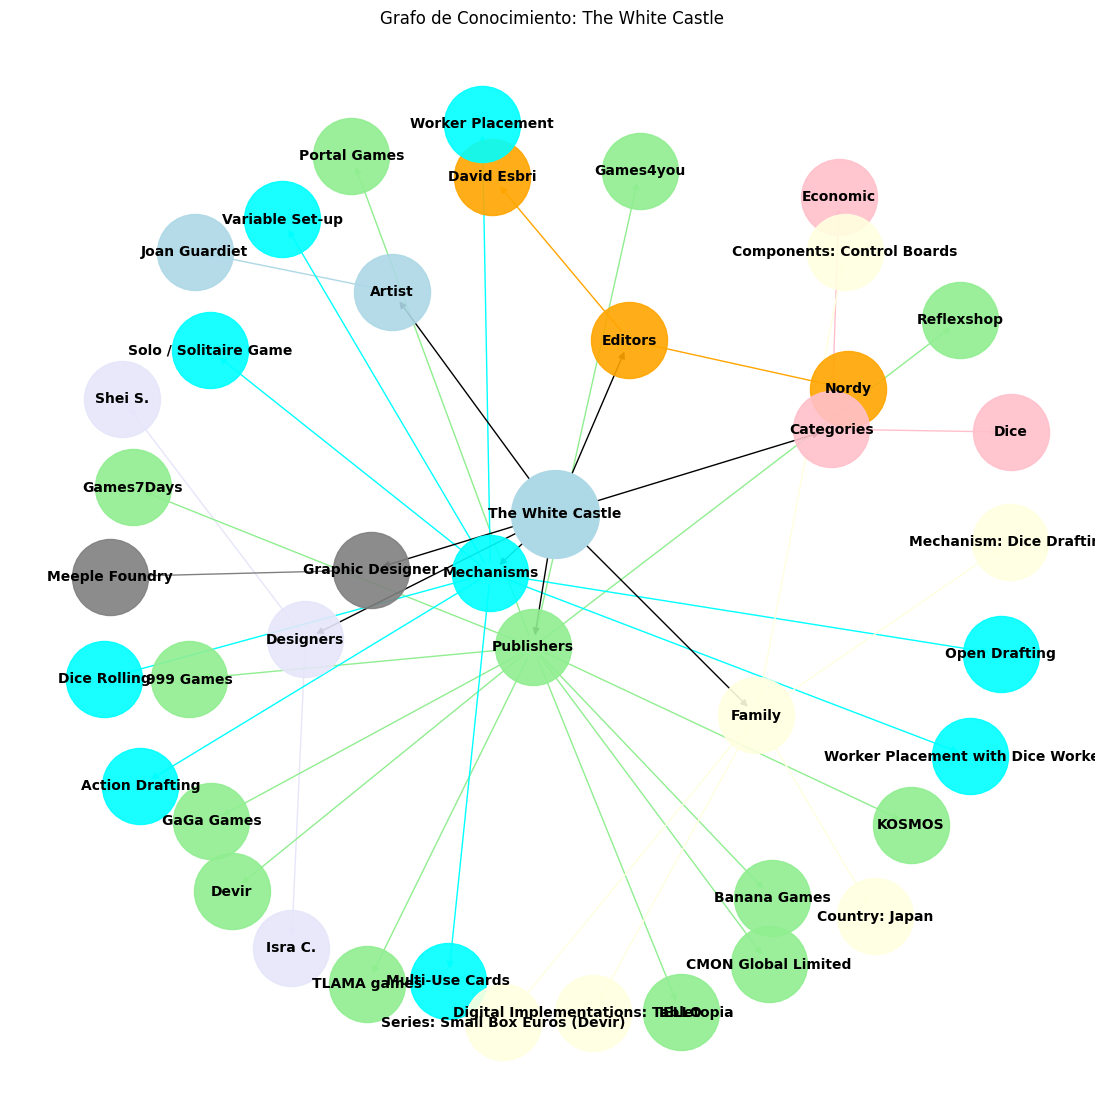

In [93]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import spacy

# Inicializar el modelo de spaCy
nlp = spacy.load("es_core_news_sm")  # Modelo en español

# Ruta al archivo JSON
file_path = "datos_grafo.json"

# Cargar los datos del archivo JSON
with open(file_path, 'r', encoding='utf-8') as file:
    datos_grafo = json.load(file)

# Nombre del juego (nodo central)
game_name = "The White Castle"

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir el nodo central al grafo
G.add_node(game_name)

# Diccionario de colores para las categorías
category_colors = {
    "Designers": "lavender",
    "Artist": "lightblue",
    "Publishers": "lightgreen",
    "Graphic Designer": "gray",
    "Editors": "orange",
    "Categories": "pink",
    "Mechanisms": "cyan",
    "Family": "lightyellow"
}

# Diccionario para almacenar las etiquetas de las aristas
edge_labels = {}

# Añadir nodos y conexiones por categoría
for category, values in datos_grafo.items():
    # Añadir la categoría como nodo y conectarla al nodo central
    G.add_edge(game_name, category)

    # Añadir los valores de la categoría como nodos y conectarlos a la categoría
    for value in values:
        G.add_edge(category, value)
        edge_labels[(category, value)] = ""  # Etiquetas opcionales (vacías en este caso)

# Visualizar el grafo (opcional)
plt.figure(figsize=(14, 14))  # Tamaño del grafo
pos = nx.spring_layout(G, k=0.5, seed=42)

# Dibujar nodos y aristas por categorías con colores distintos
for category, values in datos_grafo.items():
    nodes = [category] + values
    color = category_colors.get(category, "gray")
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=3000, node_color=color, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edgelist=[(category, value) for value in values], edge_color=color)

nx.draw_networkx_nodes(G, pos, nodelist=[game_name], node_size=4000, node_color="lightblue")
nx.draw_networkx_edges(G, pos, edgelist=[(game_name, category) for category in datos_grafo.keys()], edge_color="black")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Grafo de Conocimiento: The White Castle")
plt.axis('off')
plt.show()

## querys para acceder a las BDD

### query para BDD vectorial

In [78]:
# Función para realizar consultas a ChromaDB
def query_chromadb(query, collection, n_results=5):
    results = collection.query(query_texts=[query], n_results=n_results)

    print("Estructura de los resultados:", results)

    # Extraer documentos de la estructura de resultados
    if 'documents' in results:
        return [doc for docs in results['documents'] for doc in docs]
    else:
        raise ValueError("Estructura inesperada en los resultados de ChromaDB.")

Testeo de la query

In [80]:
def mostrar_resultados_en_parrafo(resultados, max_lineas_por_parrafo=3):
    texto_completo = ""

    for i, resultado in enumerate(resultados):
        texto_completo += resultado + " "

        # Agregar salto de línea después de `max_lineas_por_parrafo` resultados
        if (i + 1) % max_lineas_por_parrafo == 0:
            texto_completo += "\n"

    print(texto_completo)

# Consulta para buscar estrategias en una base de datos vectorial
query = "Are there any recommended strategies to win The White Castle?"
resultado_chromadb = query_chromadb(query, collection, n_results=5)

# Mostrar los resultados en formato párrafo
mostrar_resultados_en_parrafo(resultado_chromadb, max_lineas_por_parrafo=3)

Estructura de los resultados: {'ids': [['doc_216', 'doc_224', 'doc_1209', 'doc_12', 'doc_1196']], 'embeddings': None, 'documents': [['i havent found a strategy guide for white castle yet, so i decided to write one on my own. here comes the first part, an analysis of the starting cards:\nto get all your courtiers into the castle, and if you get more, you can promote them for vp and an even better lantern bonus.\ntraining ground has twice the points, having a lot of iron is good. its also ok to get your samurai onto the board late in the game, so accumulating iron over time is a good idea.', 'i havent found a strategy guide for white castle yet, so i decided to write one on my own. here comes the first part, an analysis of the starting cards:\nto get all your courtiers into the castle, and if you get more, you can promote them for vp and an even better lantern bonus.\ntraining ground has twice the points, having a lot of iron is good. its also ok to get your samurai onto the board late i

### query para BDD tabular

In [108]:
# Leer tu CSV (si no está ya cargado)
df = pd.read_csv('contenido_white_castle.csv', sep = ',')

# Función modificada para consultar datos tabulares
def query_table(prompt, df):
    if 'Category' not in df.columns:
        return f"La columna 'Category' no existe en el DataFrame. Columnas disponibles: {df.columns.tolist()}"

    # Convertir el prompt a minúsculas para comparar de forma insensible a mayúsculas/minúsculas
    prompt = prompt.lower()

    # Comparar el prompt con las categorías en minúsculas
    if "number of players" in prompt:
        return df[df['Category'].str.lower() == 'number of players'].to_dict(orient='records')
    elif "recommended minimum age" in prompt:
        return df[df['Category'].str.lower() == 'recommended minimum age'].to_dict(orient='records')
    else:
        return []

Testeo de la query

In [110]:
# Ahora deberías poder consultar correctamente
prompt = "Which is the number of players to play The White Castle?"
resultado_table = query_table(prompt, df)
print("Resultados de la tabla:", resultado_table)

Resultados de la tabla: [{'Category': 'Number of players', 'Data': '1–4 Players'}]


### query para BDD de Grafos

In [99]:
def query_graph(prompt, graph):
    """
    Consulta nodos relevantes en el grafo con base en el prompt del usuario.
    """
    # Procesar el texto con spaCy para extraer entidades
    doc = nlp(prompt)

    # Convertir el texto del prompt en minúsculas y buscar coincidencias exactas
    prompt_lower = prompt.lower()

    # Buscar entidades clave como 'Graphic Designer', 'Designer', etc.
    results = []

    for node in graph.nodes:
        if node.lower() in prompt_lower:  # Comprobar si el nodo está en el prompt
            neighbors = list(graph.neighbors(node))
            results.append(f"{node} está relacionado con {', '.join(neighbors)}")

    return results

Testeo de la query

In [100]:
# Probar la consulta con un prompt
prompt = "¿Who is the Graphic Designer of The White Castle?"
graph_results = query_graph(prompt, G)
print("Resultados del Grafo:", graph_results)

Resultados del Grafo: ['The White Castle está relacionado con Designers, Artist, Publishers, Graphic Designer, Editors, Categories, Mechanisms, Family', 'Graphic Designer está relacionado con Meeple Foundry']


## Modelos de Clasificadores

### clasificador basado en embeddings (U3)

In [112]:
# selecciona los embeddings más relevantes y los devuelve
model = SentenceTransformer('all-MiniLM-L6-v2')

def classify_with_embeddings(query, model, collection, n_results=3):
    """
    Clasifica una consulta usando embeddings y búsqueda en la base de datos ChromaDB.
    """
    query_embedding = model.encode([query])
    results = collection.query(
        query_embeddings=query_embedding,
        n_results=n_results
    )
    return results['documents']  # Retorna los documentos más similares

# Ejemplo de consulta
query = "Explain how White Castle works"
results_embedding = classify_with_embeddings(query, model, collection)
print("Clasificación basada en embeddings:", results_embedding)

Clasificación basada en embeddings: [['the white castle is a euro type game with mechanics of resource management, worker placement and dice placement to carry out actions. during the game, over three rounds, players will send members of their clan to tend the gardens, defend the castle or progress up the social ladder of the nobility. at the end of the match, these will award players victory points in a variety of ways.', 'the white castle is a euro-like game with resource management mechanisms, worker placement, and dice placement to perform actions. during the game, over the course of three rounds (in which you only have 9 turns, 3 times per round), players send members of their clan to tend the gardens, defend the castle or move up the social ladder of the nobility. at the end of the game, players are awarded victory points in a variety of ways.', 'bit to wrap your head around at first. the central mechanic of the white castle is dice placement. during the three rounds of the game,

### clasificador basado en LLM (U6)


In [154]:
class ZephyrChat:
    def __init__(self):
        """Inicializa el historial del chatbot."""
        self.conversation_history = [
            {"role": "system", "content": "You are an expert wizard in the board game The White Castle."}
        ]

    def generate_response(self, prompt: str) -> str:
        """Genera una respuesta usando el historial completo."""
        self.conversation_history.append({"role": "user", "content": prompt})

        # Simulación de respuesta del modelo para fines de depuración
        response = f"Simulación de respuesta a: {prompt}"

        self.conversation_history.append({"role": "assistant", "content": response})
        return response

# Instancia global del chatbot
chatbot_instance = ZephyrChat()

In [115]:
! pip install --upgrade llama_index

  Using cached llama_index-0.12.6-py3-none-any.whl.metadata (11 kB)
Using cached llama_index-0.12.6-py3-none-any.whl (6.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.8/431.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.27.1
    Uninstalling pydantic_core-2.27.1:
      Successfully uninstalled pydantic_core-2.27.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.19
    Uninstalling pydantic-1.10.19:
      Successfully uninstalled pydantic-1.10.19
  Attempting uninstall: llama_index
    Found existing installation: llama_index 0.5.22
    Uninstalling llama_index-0.5.22:
      Successfully uninstalled llama_index-0.5.22
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chromadb 0.5.23 r

In [116]:
from llama_index.core import SimpleDirectoryReader
from llama_index.core.schema import Document as LlamaDocument
from llama_index.core.schema import NodeWithScore

In [155]:
# Clase para búsqueda BM25
class BM25Searcher:
    def __init__(self, documents: List[LlamaDocument], language: str = 'spanish'):
        self.language = language

        # Descarga de recursos necesarios
        try:
            nltk.data.find('tokenizers/punkt')
        except LookupError:
            nltk.download('punkt')

        # Preprocesar documentos
        self.documents = documents
        self.corpus = [self._preprocess_text(doc.text) for doc in self.documents]
        self.tokenized_corpus = [self._tokenize(text) for text in self.corpus]

        # Inicializar BM25
        self.bm25 = BM25Okapi(self.tokenized_corpus)

    def _preprocess_text(self, text: str) -> str:
        text = text.lower()
        text = unidecode(text)
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def _tokenize(self, text: str) -> List[str]:
        return word_tokenize(text, language=self.language)

    def retrieve(self, query: str, top_k: int = 5) -> List[NodeWithScore]:
        processed_query = self._preprocess_text(query)
        tokenized_query = self._tokenize(processed_query)
        scores = self.bm25.get_scores(tokenized_query)
        top_indices = np.argsort(scores)[-top_k:][::-1]

        results = []
        for idx in top_indices:
            if scores[idx] > 0:
                node = NodeWithScore(
                    node=self.documents[idx],
                    score=float(scores[idx])
                )
                results.append(node)
        return results


In [156]:
# Construir el contexto a partir de múltiples fuentes
def build_context(prompt, bm25_searcher, chromadb_collection, graph, df):
    bm25_results = bm25_searcher.retrieve(prompt, top_k=2)
    chromadb_results = query_chromadb(prompt, chromadb_collection)
    graph_results = query_graph(prompt, graph)
    table_results = query_table(prompt, df)

    context = "\n".join([
        "Resultados BM25:\n" + "\n".join([doc.node.text[:200] for doc in bm25_results]),
        "Contexto ChromaDB:\n" + "\n".join(chromadb_results),
        "Contexto Grafo:\n" + "\n".join(graph_results),
        "Contexto Tabular:\n" + str(table_results)
    ])
    return context

# Generar respuesta con el contexto
def generate_response_with_context(prompt, context):
    full_prompt = f"Contexto:\n{context}\n\nPregunta del usuario:\n{prompt}"
    return chatbot_instance.generate_response(full_prompt)

# Manejar consulta del usuario
def handle_user_query(prompt, bm25_searcher, chromadb_collection, graph, df):
    context = build_context(prompt, bm25_searcher, chromadb_collection, graph, df)
    response = generate_response_with_context(prompt, context)
    return response



In [157]:
# traigo la coleccion que creé en chroma
coleccion_chromadb = client.get_collection(name="coleccion_vect")

In [158]:
contenido_white_castle = pd.read_csv('contenido_white_castle.csv', sep = ',')

In [159]:
# Ejemplo de uso
# Crear instancia de BM25Searcher
documents = [LlamaDocument(text="Texto de ejemplo 1"), LlamaDocument(text="Texto de ejemplo 2")]
bm25_searcher = BM25Searcher(documents=documents)

# Cargar colección de ChromaDB, grafo y datos tabulares
chromadb_collection = coleccion_chromadb # None  # Reemplaza con tu instancia de ChromaDB
graph = G # nx.Graph()  # Reemplaza con tu grafo cargado
df = contenido_white_castle

# Prompt del usuario
prompt = "¿how is a round in the white castle?"
response = handle_user_query(prompt, bm25_searcher, coleccion_chromadb, G, contenido_white_castle)
print(response)

Estructura de los resultados: {'ids': [['doc_1510', 'doc_35', 'doc_2', 'doc_1203', 'doc_1208']], 'embeddings': None, 'documents': [['the white castle is a euro-like game with resource management mechanisms, worker placement, and dice placement to perform actions. during the game, over the course of three rounds (in which you only have 9 turns, 3 times per round), players send members of their clan to tend the gardens, defend the castle or move up the social ladder of the nobility. at the end of the game, players are awarded victory points in a variety of ways.', 'bit to wrap your head around at first. the central mechanic of the white castle is dice placement. during the three rounds of the game, three sets of different colors of dice are rolled and placed on the matching colored bridge in numerical order from lowest to highest. the amount of dice rolled is determined by the number of players, which guarantees that however many players there are, each one only gets three dice to place 

In [160]:
# Prompt del usuario
prompt = "What is the number of players for the White Castle?"
response = handle_user_query(prompt, bm25_searcher, coleccion_chromadb, G, contenido_white_castle)
print(response)

Estructura de los resultados: {'ids': [['doc_1510', 'doc_2', 'doc_35', 'doc_1203', 'doc_119']], 'embeddings': None, 'documents': [['the white castle is a euro-like game with resource management mechanisms, worker placement, and dice placement to perform actions. during the game, over the course of three rounds (in which you only have 9 turns, 3 times per round), players send members of their clan to tend the gardens, defend the castle or move up the social ladder of the nobility. at the end of the game, players are awarded victory points in a variety of ways.', 'the white castle is a euro type game with mechanics of resource management, worker placement and dice placement to carry out actions. during the game, over three rounds, players will send members of their clan to tend the gardens, defend the castle or progress up the social ladder of the nobility. at the end of the match, these will award players victory points in a variety of ways.', 'bit to wrap your head around at first. the

In [161]:
# Prompt del usuario
prompt = "What is a round like in the board game The White Castle?"
response = handle_user_query(prompt, bm25_searcher, coleccion_chromadb, G, contenido_white_castle)
print(response)

Estructura de los resultados: {'ids': [['doc_1510', 'doc_2', 'doc_1203', 'doc_84', 'doc_35']], 'embeddings': None, 'documents': [['the white castle is a euro-like game with resource management mechanisms, worker placement, and dice placement to perform actions. during the game, over the course of three rounds (in which you only have 9 turns, 3 times per round), players send members of their clan to tend the gardens, defend the castle or move up the social ladder of the nobility. at the end of the game, players are awarded victory points in a variety of ways.', 'the white castle is a euro type game with mechanics of resource management, worker placement and dice placement to carry out actions. during the game, over three rounds, players will send members of their clan to tend the gardens, defend the castle or progress up the social ladder of the nobility. at the end of the match, these will award players victory points in a variety of ways.', 'white castle is an extremely tight euro dic